<a href="https://colab.research.google.com/github/Cococatty/MachineLearningAssignment/blob/master/448_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all required libraries
--------------------------------------


In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import seaborn as sns
import warnings
import time

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

from __future__ import print_function
from datetime import datetime
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import *
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
import keras.backend as K
from keras.wrappers.scikit_learn import KerasClassifier

from keras import optimizers

# Assisting function

In [0]:
def plot_loss_accuracy(history, title):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['acc'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f by %s' % (loss, acc, title))

# Load fashion_mnist data

In [0]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Show basic data information

In [0]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28
print("Training response shape:, ", y_train.shape)
print("Testing response shape: ", y_test.shape)

image_size = (x_train.shape[1], x_train.shape[2])

print(image_size)
print(x_train.shape[2])

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)
Training response shape:,  (60000,)
Testing response shape:  (10000,)
(28, 28)
28


# Preparing images data for fully connected network

In [0]:
# Flatten the images
image_vector_size = image_size[0] * image_size[1] # 28 * 28
x_train = x_train.reshape(x_train.shape[0], image_vector_size) /255.
x_test = x_test.reshape(x_test.shape[0], image_vector_size) /255.
print(x_train.shape)

print("First 5 training labels: ", y_train[:5]) # [5, 0, 4, 1, 9]

# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])
print(y_train.shape)

(60000, 784)
First 5 training labels:  [9 0 0 3 0]
First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(60000, 10)


# Simple models

In [0]:
def build_basic_model(num_unit = 32):
  model = Sequential()
  
  model.add(Dense(
      units = num_unit
      , activation = "sigmoid"
      , input_shape = (image_vector_size,)
  ))
  
  model.add(Dense(
      units = num_classes
      , activation = "softmax"
  ))
  
  return model
  
  
model_32 = build_basic_model()
model_64 = build_basic_model(64)
model_32.summary()
model_64.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


# Fitting models with different configurations


## Try different optimizers

In [0]:
# Build and evaluate model
def build_model_optimizer(optimizerName = "sgd"):
  # Start timer
  StartTime = time.time()
  
  # Build SGD model, unit = 32
  model_32.compile(optimizer = optimizerName, loss = "categorical_crossentropy", metrics = ["accuracy"])
  
  # Fit SGD model, unit = 32
  model_fit_32 = model_32.fit(x_train, y_train, batch_size = 128, epochs = 5, verbose = True, validation_split = 0.1)
  
  # Check SDG models, unit = 32
  loss_32, accuracy_32 = model_32.evaluate(x_test, y_test, verbose = False)
  
  # End timer
  EndTime = time.time()
  time32 = EndTime - StartTime
   
  # unit = 64
  StartTime = time.time()
  model_64.compile(optimizer =optimizerName, loss = "categorical_crossentropy", metrics = ["accuracy"])
  model_fit_64 = model_64.fit(x_train, y_train, batch_size = 128, epochs = 5, verbose = True, validation_split = 0.1)  
  loss_64, accuracy_64 = model_64.evaluate(x_test, y_test, verbose = False)
  # End timer
  EndTime = time.time()
  time64 = EndTime - StartTime
  
  print(optimizerName)
  
  plot_loss_accuracy(model_fit_32, title = optimizerName + " 32 units")
  print(f'Test loss of 32: {loss_32:.3}')
  print(f'Test accuracy of 32: {accuracy_32:.3}')
  print(f'Time consumption of 32: {time32}')
 
  plot_loss_accuracy(model_fit_64, title = optimizerName + " 64 units")
  print(f'Test loss of 64: {loss_64:.3}')
  print(f'Test accuracy of 64: {accuracy_64:.3}')
  print(f'Time consumption of 64: {time64}')

# print(model_sgd_fit_32.history.keys())

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 7s 121us/step - loss: 0.1895 - acc: 0.9321 - val_loss: 0.3591 - val_acc: 0.8812
Epoch 2/5
54000/54000 [==============================] - 2s 30us/step - loss: 0.1883 - acc: 0.9329 - val_loss: 0.3608 - val_acc: 0.8812
Epoch 3/5
54000/54000 [==============================] - 2s 31us/step - loss: 0.1857 - acc: 0.9336 - val_loss: 0.3672 - val_acc: 0.8808
Epoch 4/5
54000/54000 [==============================] - 2s 28us/step - loss: 0.1845 - acc: 0.9335 - val_loss: 0.3620 - val_acc: 0.8807
Epoch 5/5
54000/54000 [==============================] - 2s 29us/step - loss: 0.1828 - acc: 0.9339 - val_loss: 0.3570 - val_acc: 0.8832
Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 7s 129us/step - loss: 0.1287 - acc: 0.9545 - val_loss: 0.3566 - val_acc: 0.8915
Epoch 2/5
54000/54000 [==============================] - 2s 33us/step - loss: 0.1264

<Figure size 576x432 with 0 Axes>

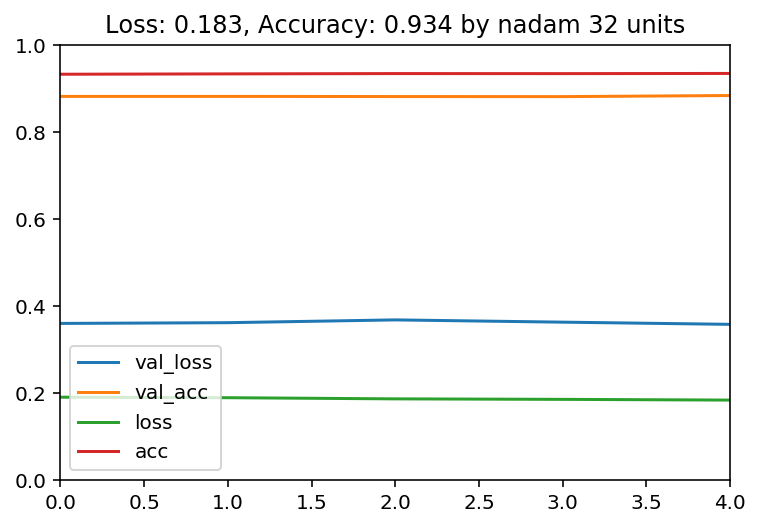

<Figure size 576x432 with 0 Axes>

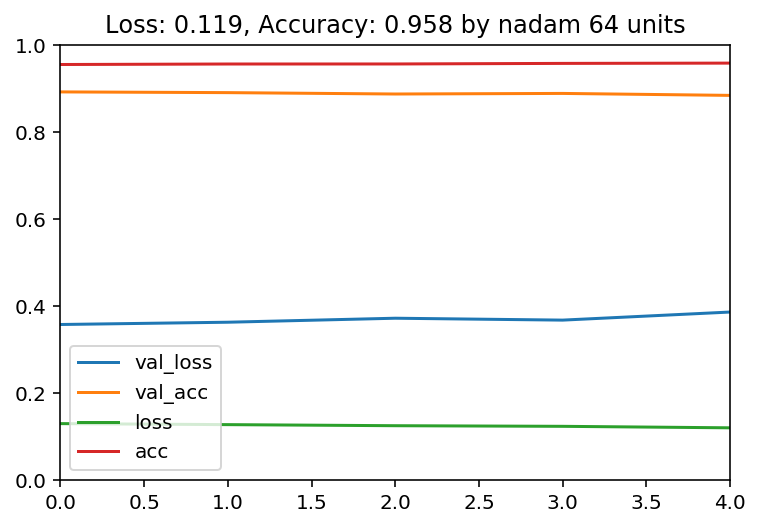

In [141]:
# build_model_optimizer(optimizerName = "sgd")
# build_model_optimizer(optimizerName = "adam")
build_model_optimizer(optimizerName = "nadam")

## Try different learning rates

In [142]:
learning_rate = 0.1

sgd = optimizers.SGD(lr = learning_rate, decay=1e-6, momentum=0.0, nesterov=True)

model.compile(optimizer = sgd, loss = "categorical_crossentropy", metrics = ["accuracy"])
# model_64.compile(optimizer = "sgd1", loss = "categorical_crossentropy", metrics = ["accuracy"])


model_fit = model.fit(x_train, y_train, batch_size = 128, epochs = 5, verbose = True, validation_split = 0.1)
loss, accuracy = model.evaluate(x_test, y_test, verbose = False)


# plot_loss_accuracy(model_32_fit)
# print(f'Test loss: {loss_32:.3}')
# print(f'Test accuracy: {accuracy_32:.3}')

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 7s 126us/step - loss: 0.7928 - acc: 0.7509 - val_loss: 0.6661 - val_acc: 0.7755
Epoch 2/5
54000/54000 [==============================] - 2s 30us/step - loss: 0.6219 - acc: 0.7915 - val_loss: 0.5816 - val_acc: 0.7937
Epoch 3/5
54000/54000 [==============================] - 2s 29us/step - loss: 0.5502 - acc: 0.8143 - val_loss: 0.5296 - val_acc: 0.8162
Epoch 4/5
54000/54000 [==============================] - 2s 29us/step - loss: 0.5102 - acc: 0.8258 - val_loss: 0.4935 - val_acc: 0.8247
Epoch 5/5
54000/54000 [==============================] - 2s 30us/step - loss: 0.4841 - acc: 0.8338 - val_loss: 0.4726 - val_acc: 0.8305


## Try different batch sizes

## Try different architectures

# More dynamic models
Prepare the random modelling environment

In [0]:
# Optimizer options for random models
opt_dict = {'nadam':Nadam,
            'adam':Adam,
            'sgd':SGD,
            'rmsprop':RMSprop,
            'adadelta':Adadelta,
            'adagrad':Adagrad}


## some units are randomly removed
def build_dropout_model():
  model = Sequential()

  # The input layer requires the special input_shape parameter which should match
  # the shape of our training data.
  model.add(Dense(units=32, activation='sigmoid', input_shape=(image_vector_size,)))
  # probability of being dropped out is 0.2
  model.add(Dropout(0.2))
  model.add(Dense(units=num_classes, activation='softmax'))
  return model

## two layers
def build_deeper_model():
  model = Sequential()
  model.add(Dense(units=64, activation='sigmoid', input_shape=(image_vector_size,)))
  model.add(Dense(units=32, activation='sigmoid'))
  model.add(Dense(units=num_classes, activation='softmax'))
  return model



## Implement random modelling

In [0]:
model = build_dropout_model()
# or
model = build_deeper_model()
# or make your own model! (recommended)

# set all the following values yourself
optimizer_name  = 'nadam' # any of the following: nadam, adam, sgd, rmsprop, adadelta, adagrad
learning_rate = 0 # some number between 0 and 1
batch_size = 128 #some integer, try some number that's a power of 2
training_epochs = 20 # some integer


# selects optimizer and sets learning rate
optimizer = opt_dict[optimizer_name](lr=learning_rate)

model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs, verbose=True, validation_split=.1)

## Select optimal models

## Plot optimal models

In [0]:
plot_loss_accuracy(history)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')